<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [273]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [274]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import Pool, cv
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [275]:
train = pd.read_csv(r'C:\Users\mikhalchuk\Desktop\степик\train.csv')
test = pd.read_csv(r'C:\Users\mikhalchuk\Desktop\степик\test.csv')

In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [277]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [278]:
for index, item in enumerate(test['TotalSpent']):
    if item == ' ':
        test['TotalSpent'][index] = np.nan
    else: continue
    
test.TotalSpent = test.TotalSpent.astype(float)

In [279]:
for index, item in enumerate(train['TotalSpent']):
    if item == ' ':
        train['TotalSpent'][index] = np.nan
    else: continue
    
train.TotalSpent = train.TotalSpent.astype(float)

In [280]:
#Функция подсчета доли пропусков
def nan_ratio(data, column):
    return round(data[column].isna().sum() / len(data) * 100, 1)

In [281]:
train_columns = train.columns.to_list()
nan = []
for column in train_columns:
    ratio = nan_ratio(train, column)
    nan.append(ratio)

nan_info = pd.DataFrame(nan, index = train_columns, columns = ['nan_ratio_%']).sort_values(by='nan_ratio_%',                                                                                          ascending=False)

In [282]:
nan_info.head()

,nan_ratio_%
TotalSpent,0.2
ClientPeriod,0.0
HasOnlineBackup,0.0
PaymentMethod,0.0
IsBillingPaperless,0.0


Пропуски в столбце **TotalSpent** можно было бы заменить по формуле `(ClientPeriod* MonthlySpending)`, так как остальные значения равны результату данного произведения, но с небольшой погрешностью. Погрешность могла возникнуть из-за различных факторов, например, смена типа конктракта и т.д. Но, чтобы данные были максимально чистыми и так как пропусков незначительное количество, принято решение их удалить.  
В остальных колонках пропуски отсутсвуют, поэтому переходим к анализу данных. 

In [283]:
train.dropna(axis=0, subset=['TotalSpent'], inplace=True)

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [285]:
train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461
std,24.534723,30.177911,2269.014233
min,1.000000,18.250000,18.800000
25%,9.000000,35.500000,401.100000
50%,29.000000,70.450000,1410.250000
75%,55.000000,90.050000,3807.350000
max,72.000000,118.750000,8684.800000


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [286]:
train.loc[train['ClientPeriod'] == 1]['Churn'].value_counts()

1    282
0    175
Name: Churn, dtype: int64

In [287]:
train[cat_cols[0]].value_counts().index.to_list()

['Male', 'Female']

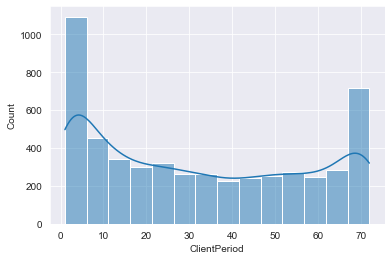

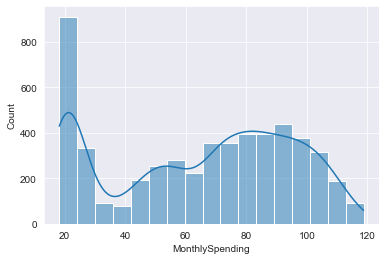

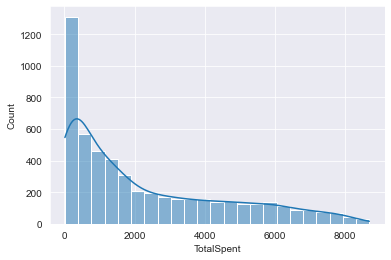

In [288]:
for num_col in num_cols:
    plt.figure(num_col)
    sns.histplot(data = train[num_col], kde=True)


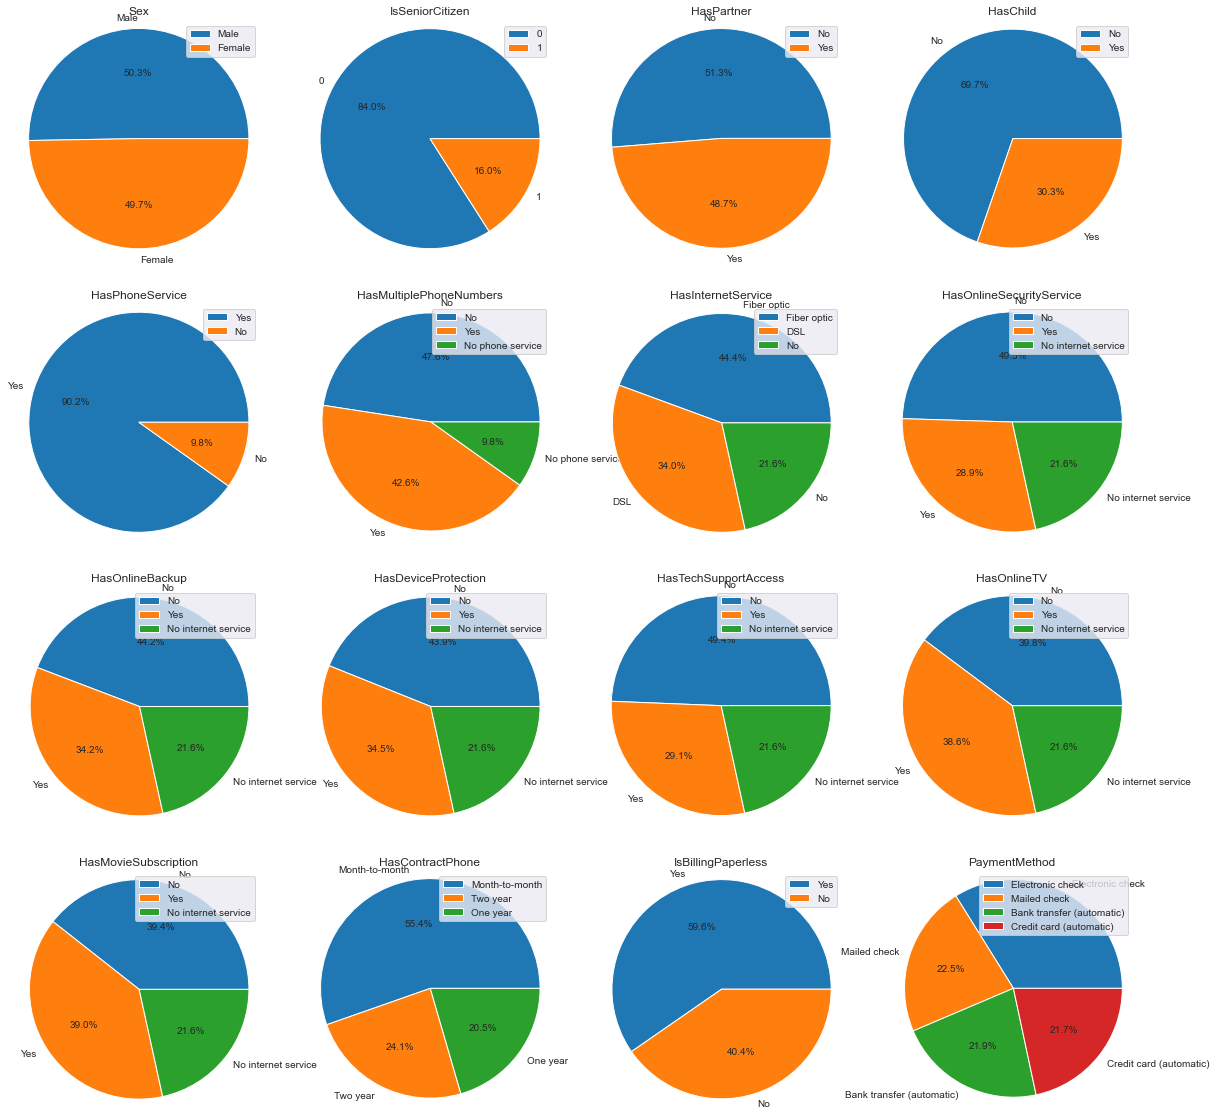

In [289]:
fig = plt.figure(figsize =(20, 20))
for i in range(len(cat_cols)):
  train_i=train[cat_cols[i]].value_counts()
  plt.subplot(4,4,i+1)
  plt.pie(train_i, labels = train_i.index, autopct='%1.1f%%')
  plt.axis('equal')
  plt.title(cat_cols[i])
  plt.legend()


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Text(0.5, 1.0, 'Распределение целевых классов')

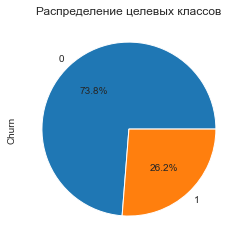

In [290]:
train[target_col].value_counts().plot.pie(autopct="%.1f%%")
plt.title('Распределение целевых классов')

Видно, что человые признаки распределены неравномерно. Следовательно, как минимум нецелесообразно использовать метрику accuracy для оценки качества модели. Также в дальнейшем будут применены такие методы борьбы с дисбалансом как увелечение и уменьшение выборки. Но для начала необходимо подготовить данные. Численные признаки - масштабировать, а категориальные - стандартизировать.

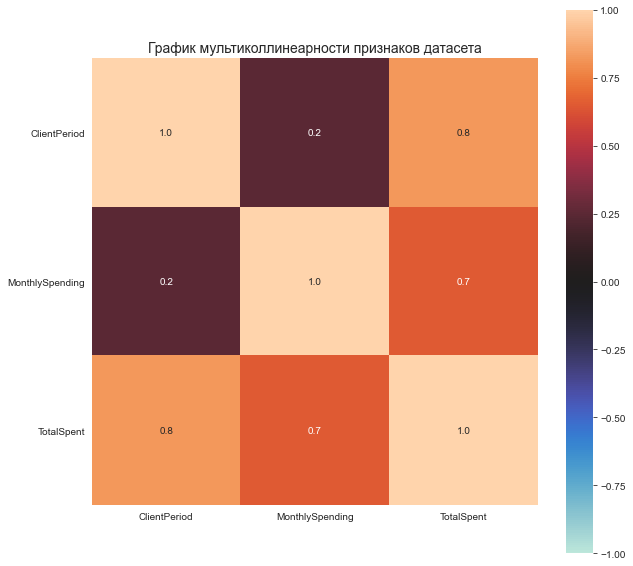

In [291]:
fig, ax = plt.subplots()
sns.heatmap(train[num_cols].corr(), vmin=-1, vmax=1, center=0, square=True, annot=True, fmt='.1f')
fig.set_figwidth(10)
fig.set_figheight(10)
plt.title('График мультиколлинеарности признаков датасета', fontsize=14)
plt.show()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [292]:
numeric_data = train[num_cols]
categorial_data = train[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = train.iloc[:, :-1]
y = train[target_col]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

cls = make_pipeline(StandardScaler(),LogisticRegression())
param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
search = GridSearchCV(cls, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'logisticregression__C': 10.0}
0.8447388460416845
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10.0))])


Видим, что лучший показатель (0.84) достигается при с=10

## Увеличение выборки
Для того, чтобы избавиться от дисбаланса увеличим выборку в 4 раза. Сначала скопируем несколько раз положительные объекты, затем создадим новую обучающую выборку и перемешаем выборку.
По тому же принципу проведем уменьшение выборки и проверим качество моделей на увеличенной и уменьшенной выборках

In [293]:

def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

    
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

print(features_upsampled.shape)
print(target_upsampled.shape)

(6052, 30)
(6052,)


### Логистическая регрессия 

In [294]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("ROC-AUC:", roc_auc_score(target_valid, predicted_valid))

ROC-AUC: 0.7671869311976702


### Случайный лес

In [295]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("ROC-AUC:", roc_auc_score(target_valid, predicted_valid))

ROC-AUC: 0.6906276544108726


## Уменьшение выборки

Показатели выросли, посмотри что произойдет при уменьшении выборки

In [296]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=0.1, random_state=12345)
    target_sample = target_zeros.sample(frac=0.1, random_state=12345)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)
    

    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1339, 30)
(1339,)


### Логистическая регрессия

In [297]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("ROC-AUC:", roc_auc_score(target_valid, predicted_valid))

ROC-AUC: 0.7109073534765198


### Случайный лес

In [298]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("ROC-AUC:", roc_auc_score(target_valid, predicted_valid))

ROC-AUC: 0.6947442664725154


## Применение градиентного бустинга 

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [299]:
categorical_indices=[train.columns.get_loc(c) for c in cat_cols if c in train]
X_train_origin, X_test_origin, y_train, y_test= train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
boosting_model =CatBoostClassifier(cat_features=categorical_indices, 
                                            random_seed=42, verbose=False)
grid={'learning_rate': np.arange(0.01, 0.2, 0.01),
      'depth': [2, 4, 6, 8, 10],
      'l2_leaf_reg': [1, 3, 5, 7, 9],
      'iterations' : [100, 200, 300]} 
grid_search_result = boosting_model.grid_search(grid, 
                           X_train_origin, 
                           y_train, 
                           plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4857850579
bestIteration = 99

0:	loss: 0.4857851	best: 0.4857851 (0)	total: 2.33s	remaining: 55m 14s

bestTest = 0.4409272067
bestIteration = 99

1:	loss: 0.4409272	best: 0.4409272 (1)	total: 4.43s	remaining: 52m 34s

bestTest = 0.4246096272
bestIteration = 99

2:	loss: 0.4246096	best: 0.4246096 (2)	total: 6.55s	remaining: 51m 46s

bestTest = 0.4186176461
bestIteration = 99

3:	loss: 0.4186176	best: 0.4186176 (3)	total: 8.74s	remaining: 51m 44s

bestTest = 0.4142710003
bestIteration = 98

4:	loss: 0.4142710	best: 0.4142710 (4)	total: 10.8s	remaining: 51m 18s

bestTest = 0.4101696093
bestIteration = 99

5:	loss: 0.4101696	best: 0.4101696 (5)	total: 12.9s	remaining: 50m 47s

bestTest = 0.409288868
bestIteration = 98

6:	loss: 0.4092889	best: 0.4092889 (6)	total: 15.2s	remaining: 51m 10s

bestTest = 0.4085383397
bestIteration = 95

7:	loss: 0.4085383	best: 0.4085383 (7)	total: 17.5s	remaining: 51m 32s

bestTest = 0.4059037255
bestIteration = 99

8:	loss: 0.4059037	best: 0.4

In [300]:
grid_search_result['params']
#{'depth': 2, 'l2_leaf_reg': 9, 'iterations': 200, 'learning_rate': 0.1}

{'depth': 2, 'l2_leaf_reg': 9, 'iterations': 200, 'learning_rate': 0.1}

In [301]:
model_cat = CatBoostClassifier(iterations = 200, learning_rate = 0.1, depth = 2, l2_leaf_reg = 9, cat_features=categorical_indices)
model_cat.fit(X_train_origin, y_train)
y_train_predicted = model_cat.predict_proba(X_train_origin)[:, 1]
y_test_predicted = model_cat.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6474209	total: 7.36ms	remaining: 1.47s
1:	learn: 0.6131983	total: 14.7ms	remaining: 1.45s
2:	learn: 0.5835306	total: 25.7ms	remaining: 1.69s
3:	learn: 0.5605272	total: 36.3ms	remaining: 1.78s
4:	learn: 0.5403218	total: 46.9ms	remaining: 1.83s
5:	learn: 0.5254459	total: 59.2ms	remaining: 1.91s
6:	learn: 0.5151046	total: 72.9ms	remaining: 2.01s
7:	learn: 0.5052524	total: 84.6ms	remaining: 2.03s
8:	learn: 0.4968901	total: 95.1ms	remaining: 2.02s
9:	learn: 0.4832057	total: 107ms	remaining: 2.03s
10:	learn: 0.4717341	total: 119ms	remaining: 2.05s
11:	learn: 0.4629596	total: 133ms	remaining: 2.08s
12:	learn: 0.4565889	total: 191ms	remaining: 2.75s
13:	learn: 0.4517920	total: 205ms	remaining: 2.72s
14:	learn: 0.4478250	total: 233ms	remaining: 2.87s
15:	learn: 0.4432832	total: 244ms	remaining: 2.81s
16:	learn: 0.4398358	total: 259ms	remaining: 2.79s
17:	learn: 0.4378057	total: 273ms	remaining: 2.76s
18:	learn: 0.4354019	total: 301ms	remaining: 2.87s
19:	learn: 0.4335547	total: 316m

In [306]:
print("Лучшее качество: ", 'test auc = ', roc_auc_score(y_test, y_test_predicted))
print('При следующих параметрах:', grid_search_result['params'])

Лучшее качество:  test auc =  0.8440835102618542
При следующих параметрах: {'depth': 2, 'l2_leaf_reg': 9, 'iterations': 200, 'learning_rate': 0.1}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество дала модель CatBoostClassifier с learning_rate = 5%

# Предсказания

In [303]:
best_model =model_cat
best_model.fit(X_train_origin, y_train)
y_train_predicted = best_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = best_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6474209	total: 7.78ms	remaining: 1.55s
1:	learn: 0.6131983	total: 15.7ms	remaining: 1.56s
2:	learn: 0.5835306	total: 27.1ms	remaining: 1.78s
3:	learn: 0.5605272	total: 37.7ms	remaining: 1.85s
4:	learn: 0.5403218	total: 51.3ms	remaining: 2s
5:	learn: 0.5254459	total: 63.3ms	remaining: 2.05s
6:	learn: 0.5151046	total: 76.4ms	remaining: 2.11s
7:	learn: 0.5052524	total: 88.4ms	remaining: 2.12s
8:	learn: 0.4968901	total: 101ms	remaining: 2.15s
9:	learn: 0.4832057	total: 112ms	remaining: 2.14s
10:	learn: 0.4717341	total: 126ms	remaining: 2.16s
11:	learn: 0.4629596	total: 139ms	remaining: 2.18s
12:	learn: 0.4565889	total: 150ms	remaining: 2.16s
13:	learn: 0.4517920	total: 161ms	remaining: 2.14s
14:	learn: 0.4478250	total: 175ms	remaining: 2.16s
15:	learn: 0.4432832	total: 189ms	remaining: 2.18s
16:	learn: 0.4398358	total: 204ms	remaining: 2.2s
17:	learn: 0.4378057	total: 215ms	remaining: 2.18s
18:	learn: 0.4354019	total: 226ms	remaining: 2.15s
19:	learn: 0.4335547	total: 239ms	rem

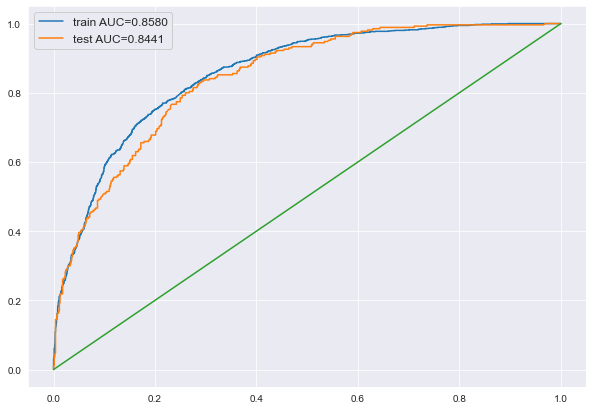

In [304]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Submission

In [305]:
X_test = pd.read_csv(r'C:\Users\mikhalchuk\Desktop\степик\test.csv')
X_test = X_test.replace(' ', float('0'))
X_test = X_test.replace('?', float('0'))
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)
submission = pd.read_csv('C:/Users/mikhalchuk/Desktop/степик/submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] 
submission.to_csv('C:/Users/mikhalchuk/Desktop/степик/submission.csv', index=False)


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.